In [34]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram, array_to_latex
from math import pi
%matplotlib inline

/tmp/ipykernel_1241/3921326552.py:4: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.cnot()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.cx as direct replacement.
  circuit.cnot(0, 1)


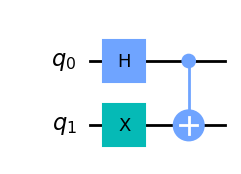

In [35]:
circuit = QuantumCircuit(2)
circuit.x(1)
circuit.h(0)
circuit.cnot(0, 1)
circuit.draw(output='mpl', style='clifford')

In [36]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circuit, backend=simulator).result()
statevector = result.get_statevector()
array_to_latex(statevector, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

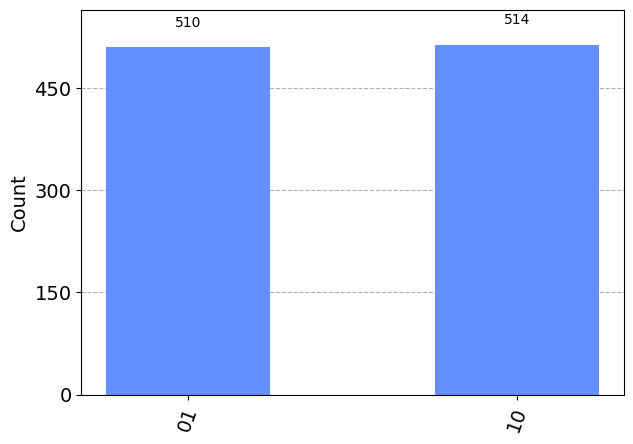

In [37]:
circuit.measure_all()
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator).result()
plot_histogram(result.get_counts())